## **Comparative study on state of digital learning, based on gdp per capita, ethnic community and school funding**

# 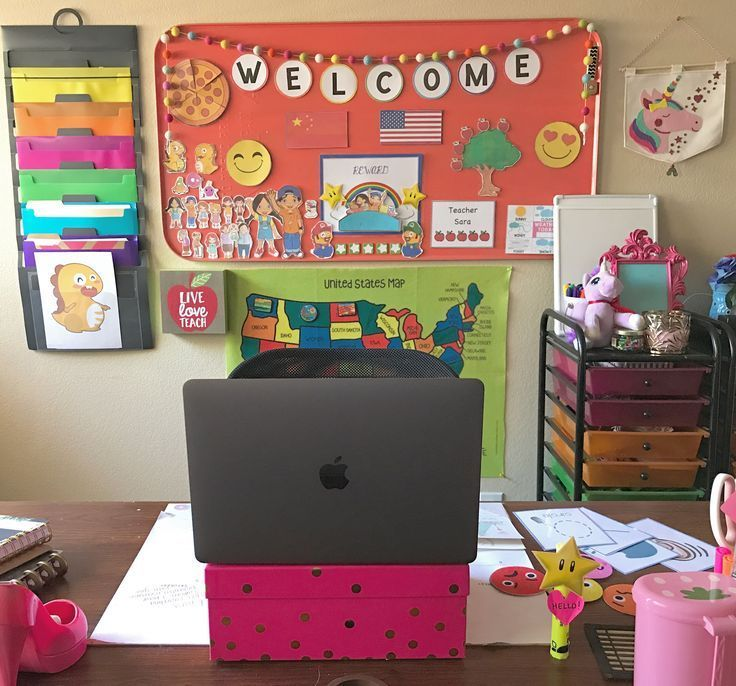 

# **Abstract**

Not every student has equal opportunities to learn. There cann't be a bigger truth in education world today and these inequalities at most of the part of the world are increasing currently.

Our analysis of the data provided follows the goal of this competition, which are :

a. better understand and 
b. measure the scope and impact of the pandemic on these inequities.

In this work, as external data, we have used only state based GDP per capita values of USA, in 2019, which are openly available.

We explored two big factors, which are likely to drive the inequity in any aspect of scoiety. 1. Financial factors 2. Community factors.
In our work we explored financial aspects with the help of funding based data and additionally with GDP per captita values of the states. GDP per capita values are strong indicators of affordability of the people, which influences students, as well as educators. **We assessed overall picture of engagement in different quarters of 2020, first. Then, based on product types, we analysed several factors associated with education, which are equally important, apart from regular engagement. This includes, participation in school safety programs, preschool learning/junior grade learning, skill development of teachers etc.** 

We made sure, that we capture the change in engagement level in all these aspects from quarterly basis and per district basis, for the ease of comparison.

Our findings show that although the overall engagement index has increased, inequities are indeed present in all of these aspects and sometimes got aggrevated by pandemic, under strong influence of financial factors. Percentage of ethnic communities in school districts also made us see noticeable differences, such as lag in school safety and teacher's development.

# **Approach**


Financial factors always make crucial differences in any aspect of a society and also at district level operations. Education is not an exception.
That's why, instead of working with all the states, we have picked only a few, based on availability of no. of school district's data available in the state and GDP per capita value of the state.

These states are

**1. Connecticut**

**2. Utah**

**3. Illinois**

**4. California**

**5. Ohio**

**6. New York**

**7. Indiana**

**8. Washington**

**9. District Of Columbia**


Below we will explain why these states were chosen over others.

Before that, let's summarize the data selection method.


# **Data selection summary**

1. Above mentioned 9 states have been chosen.
2. Engagement data involves data on many products, which are not present in product catalogue. We have excluded those.
3. Districts that do not provide value for any of the features, have been dropped.



In [ ]:
import pandas as pd 
import glob
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
import plotly as ply
import altair as alt
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 4444em,width: 4444em; }</style>"))

import warnings
warnings.filterwarnings("ignore")
cm = sns.light_palette("lightgreen", as_cmap=True)

In [ ]:
# Read the data

districts = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
products = pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
state_data = pd.read_csv('/kaggle/input/learnplatform-state-data/state_data.csv')

products.rename(columns={'LP ID':'lp_id'},inplace=True)

products['Primary Essential Function'].fillna('No value',inplace=True)

# Split the primary essential function value into category and sub-category

products['Primary Essential Function-category'] = products['Primary Essential Function'].apply(lambda x:x[:2])
products['Primary Essential Function-Sub category'] = products['Primary Essential Function'].apply(lambda x:x[3:])

# Drop those districts, that do not provide any data

all_na_idx = districts[['state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']].isna().sum(axis=1)[districts[['state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw']].isna().sum(axis=1)==6].index.values


no_info_dists = districts['district_id'].iloc[all_na_idx]

districts.drop(all_na_idx,inplace=True)
districts.reset_index(inplace=True)

# Re-categorize the pp_total_raw segment in 'less than 10000','between 10k and 16k' and 'more than 160000'

districts['pp_total_raw'].replace(['[8000, 10000[','[6000, 8000[','[4000, 6000['],'less than 10000',inplace=True)
districts['pp_total_raw'].replace(['[10000, 12000[','[12000, 14000[','[14000, 16000['],'between 10k and 16k',inplace=True)
districts['pp_total_raw'].replace(['[16000, 18000[','[18000, 20000[','[20000, 22000[','[22000, 24000[','[32000, 34000['],'more than 16000',inplace=True)


# Read engagement data

path = "engagement_data"
all_files = glob.glob('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data' + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['district_id'] = filename.split('/')[-1].split('.')[0]
    li.append(df)
    
engagements = pd.concat(li, axis=0, ignore_index=True)
engagements['district_id'] = engagements['district_id'].astype('int')


# Merge district and product data with engagement data

engagements = engagements.merge(districts,on='district_id',how='left')
engagements = engagements.merge(products,on='lp_id',how='left')

# Find time related properties

engagements['time'] = pd.to_datetime(engagements['time'])
engagements['year'] = engagements['time'].dt.year
engagements['week_of_year'] = engagements['time'].dt.week
engagements['month'] = engagements['time'].dt.month
engagements['quarter'] = engagements['time'].dt.quarter
# engagements.drop('time',axis=1,inplace=True)




selected_states = ['Connecticut','Utah','Illinois','California','Ohio','New York','Indiana','Washington','District Of Columbia']

# Select products that are present in product_info

engagements = engagements[engagements['lp_id'].isin(products['lp_id'])]

# Merge state data
engagements = engagements[engagements['state'].isin(selected_states)]
engagements = engagements.merge(state_data,on='state',how='left')


# **State data**

Below you can see the information for the selected states and sources for these informations have been mentioned as well.
We have gathered GDP per capita value of 2019, student population in 2021, african-american and hispanic-latino population at these states in 2019 and 2020. 
We also have segmented these states based on gdp per capita value into 4 categories, 'very high','high','medium','low'.

**Average GDP per capita of USA in 2019 was 65k.** 

**States having a gdp per capita value lower than this have been categories into 'Low'. Illinois having a value 70k have been categorized as 'medium' and states with value above 80k have been categorized as 'high' and 'very high'.**

GDP per capita value tells us about the financial situation of the people in these states. It gives us hint on affordability, funding of the schools, possible impact of pandemic on families. States with higher GDP per capita value is more likely to sustain a tough financial situation compared to a state with low GDP per capita value.

Also most of these states have ample no. of school districts available, to draw any inference at state level. Only exception is District of Columbia, where we have data from only 3 school districts. However, given the very high GDP per capita value and a higher african-american population percentage, we have included this state.



In [ ]:
state_data.style.set_caption('State Data').background_gradient(subset = 'gdp per capita(in dollars) in 2019',cmap=cm,axis=0)

In [ ]:
state_bars = alt.Chart(state_data).mark_bar(size=17).encode(
    y=alt.Y('state'),
    x=alt.X('gdp per capita(in dollars) in 2019',stack='zero'),
    color='gdp per capita segment',
    opacity=alt.value(0.75)
    
    )

line = alt.Chart(pd.DataFrame({'gdp per capita(in dollars) in 2019': [65000],'text':'Average GDP per capita of USA in 2019'})).mark_rule(color='red').encode(x='gdp per capita(in dollars) in 2019',tooltip='text')

text = alt.Chart(state_data).mark_text(dx=16, dy=1, color='#0e7735',size=10).encode(
    y=alt.Y('state'),
    x=alt.X('gdp per capita(in dollars) in 2019', stack='zero'),
    detail='GDP per capita:N',
    text=alt.Text('gdp per capita(in dollars) in 2019'),
    )

state_bars.height = 300
state_bars.width = 600

(state_bars+line+text).properties(title={
    'text':['GDP per capita value for each state',('Red line marks average GDP per capita of USA in 2019 ')],
    })

Sources for collected state data:

https://educationdata.org/k12-enrollment-statistics

https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

https://en.wikipedia.org/wiki/List_of_U.S._states_by_Hispanic_and_Latino_population

https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP_per_capita

In [ ]:
# Chart showing No. of school district in each of the states
state_district_count = pd.DataFrame(districts[districts['state'].isin(selected_states)].groupby(['state'])['locale'].value_counts()).rename(columns={'locale':'Number of districts'}).reset_index()
state_bars = alt.Chart(state_district_count).mark_bar(size=17).encode(
    y=alt.Y('state'),
    x=alt.X('Number of districts'),
    tooltip=['locale','Number of districts'],
    color=alt.Color('locale',\
                    legend=alt.Legend(orient='bottom'),
                    scale=alt.Scale(
            domain=['City','Suburb','Rural','Town'],
                        scheme='Set2'
                    )),
    opacity=alt.value(0.8)
                    ).properties(title={
    'text':['Number of districts in each state',
           '(Along with no. of districts in each locale)'],
    })

state_bars.height = 300
state_bars.width = 650



state_bars


In [ ]:
# Chart showing No. of school district in each of ethnic % category

source = pd.DataFrame(districts[districts['state'].isin(selected_states)]['pct_black/hispanic'].value_counts()).reset_index()
source.columns = ['pct_black/hispanic','Number of districts']

state_bars = alt.Chart(source).mark_bar(size=17).encode(
    y=alt.Y('pct_black/hispanic'),
    x=alt.X('Number of districts'),
    opacity=alt.value(0.75),
    tooltip = ['pct_black/hispanic','Number of districts']
    
    )


state_bars.height = 200
state_bars.width = 650

(state_bars).properties(title={
    'text':['Number of districts in each ethnic student percentage based category'],
    })

# **Metric explanation**

Before we start with the analysis, let's have our understanding clear about the metrics, we are going to use overall.
As a goal of this competition , we have to analyse how the usage of technology and learning behaviour has changed and so, we have decided to emphasize on following factors to do this analysis.


1. **Quarter and not month** : Instead of months, analyse based on quarters. Why? Because 1st quarter in USA, was pretty much normal and day-to-day operations were not significantly hit by the pandemic and most of the schools were cautioned, but remained open. 1st quarter data can be considered as normal usage data. 3rd quarter is all about summer break and 4th quarter in 2020 was all about massive 2nd wave of covid. Values aggregated at quarterly level also helps to reduce noise.

2. **Not Engagement index but Engagement index/district** : Since most of our analysis related to engagement index will happen in different dimensions, such as, state,gdp per capita segment or 'percentage of African-Amercian/Hispanic', we need to calculate **page load per thousand student (engagement index)per district** to take a relevant and comparable measurement. No. of school districts are different in each of these dimensions.

3. **% Growth in 2nd,3rd,4th quarter compared to 1st quarter** : Since 1st quarter shows the normal usage data, we will observe, how the usage changed over 2nd and 4th quarter especially , when student had to engage in online learning without any other option. This growth will be measured by percentage change over 1st quarter usage.

    Combinedly, this is what makes up a metric like **'% Growth on engagement index/1k student/district in X quarter'**


4. **Overall value for 2020** : It's important to observe the state of learning at the end of year, to see, how the financial or community factors influenced the overall performance in 2020. **'Sum of page loads/per thousand student/per district in 2020'** is such a metric. 


# **Summary of findings**  

**1. Strong poistive correlation of .94 between GDP per capita value and % Growth on engagement index/1k student/district in 4th quarter**

**2. From quarter to quarter, linear growth of positive correlation between% growth of engagement index/district against GDP per capita income of the states**

**3. Classroom management related products have grown the most by usage, as per expectation.**

**4. Cities are showing incremental growth, but overall still behind rural and suburb districts by a small margin.**

**5. Huge surge in usage of streaming services. Youtube being the favourite, as always.**

**6. School safety program is lagging in districts with more than 60% students from ethnic backgrounds**

**7. Negative correlation. Districts with higher percentage of student from ethnic backgroud are lagging behind on teachers training and development**

**8. strong positive correlation between funding and teachers development**

**9. Inequity on lines of funding and ethnicity. Linear and strong negative correlation between percentage of student from ethnic background and engagement in preschool learning product. Noticeable association with funding.**

Let's explore these findings in detail.

# **Observation 1: Strong poistive correlation of .94 between GDP per capita value and % Growth on engagement index/1k student/district in 4th quarter** 

Let us begin by looking at overall engagement index, irrespective of products that students and teachers used.

We can see, there have been a huge 3 figure jump in states like Connecticut,Washington,California and District of Columbia at the end of 4th quarter.

1. California has noticeably grown in engagement and in very steady manner.
2. District of Columbia has 3.5x time gdp per capita value than that of average gdp per capita of USA. The huge increment by percentage in 3rd and 4th quarter can be assumed to have a direct correlation with it.
3. Ohio is the only state that has shown an overall decline in engagement at the end of 2020.

In [ ]:


# find sum of engagement index grouped by state and quarter

total_engagement_by_quarter = pd.DataFrame(engagements.groupby(['state','quarter'])['engagement_index'].sum())
total_engagement_by_quarter = total_engagement_by_quarter.reset_index().pivot(columns='quarter',values='engagement_index',index='state')

# find no. of districts present in each of these groups
temp = engagements[engagements['state'].isin(selected_states)]
range_count = pd.DataFrame(temp[['district_id','state']].drop_duplicates()[['state']].value_counts())

# divide sum of engagement index by no. of districts to find per district value in each quarter
for range_value in total_engagement_by_quarter.index.values:
    total_engagement_by_quarter.loc[range_value] = total_engagement_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]

# Sum the over all value to find annual value for 2020
total_engagement_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = total_engagement_by_quarter.sum(axis=1)# total

# find the growth in 2nd,3rd and 4th quarter using the total value in 1st quarter
total_engagement_by_quarter['% Growth on engagement index/1k student/district in 2nd quarter'] = 100*(total_engagement_by_quarter[2]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]
total_engagement_by_quarter['% Growth on engagement index/1k student/district in 3rd quarter'] = 100*(total_engagement_by_quarter[3]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]
total_engagement_by_quarter['% Growth on engagement index/1k student/district in 4th quarter'] = 100*(total_engagement_by_quarter[4]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]

total_engagement_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: 'Total no. of page loads/1k student/district in 2nd quarter',
    3: 'Total no. of page loads/1k student/district in 3rd quarter',
    4: 'Total no. of page loads/1k student/district in 4th quarter',
},inplace=True)

# sort values by total engagement index/per district
# total_engagement_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020')

In [ ]:
# chart showing jump in 4th quarter for each state
source = total_engagement_by_quarter.reset_index()[['state','% Growth on engagement index/1k student/district in 2nd quarter',
       '% Growth on engagement index/1k student/district in 3rd quarter',
       '% Growth on engagement index/1k student/district in 4th quarter']]

source.columns= ['state',2,3,4]
source = source.melt(id_vars=['state'],value_vars=[2,3,4])
source.columns= ['state','quarter','% Growth on engagement index/1k student/district']

chart = alt.Chart(source).mark_line(point=True,size=2).encode(
    y='% Growth on engagement index/1k student/district:Q',
    x='quarter:N',
    color='state',
    strokeDash='state',
    tooltip=['state','quarter','% Growth on engagement index/1k student/district']
)

chart.height = 500
chart.width = 650

line = alt.Chart(pd.DataFrame({'% Growth on engagement index/1k student/district': [0],'text':'Zero growth line'})).mark_rule(color='red').encode(y='% Growth on engagement index/1k student/district',tooltip='text')


(chart+line).properties(title={
    'text':['Growth on engaement index in 2nd,3rd,4th quarter over 1st quarter'],
    })

Let's see what kind of correlation we have with quarterly growth and GDP per capita value of these states. Since, District of Columbia has quite higher GDP per capita, we will look athis correlation with and witthout it.

In [ ]:


temp = total_engagement_by_quarter.reset_index().merge(state_data,on='state')
temp[['% Growth on engagement index/1k student/district in 4th quarter','gdp per capita(in dollars) in 2019']].corr()\
.style.set_caption('Correlation including District of Columbia')

In [ ]:

temp = total_engagement_by_quarter.reset_index().merge(state_data,on='state')
temp[temp['state']!='District Of Columbia'][['% Growth on engagement index/1k student/district in 4th quarter','gdp per capita(in dollars) in 2019']].corr()\
.style.set_caption('Correlation excluding District of Columbia')

In [ ]:
source = temp[['% Growth on engagement index/1k student/district in 4th quarter','gdp per capita(in dollars) in 2019','state']]

base = alt.Chart(source).mark_circle(color="blue",size=60).encode(
        alt.X("% Growth on engagement index/1k student/district in 4th quarter"), alt.Y("gdp per capita(in dollars) in 2019"),
        tooltip =['state','% Growth on engagement index/1k student/district in 4th quarter','gdp per capita(in dollars) in 2019']
)

base.height = 350
base.width = 550

degree_list = [2]

polynomial_fit = [
    base.transform_regression(
        "% Growth on engagement index/1k student/district in 4th quarter", "gdp per capita(in dollars) in 2019", method="poly", order=order, as_=["% Growth on engagement index/1k student/district in 4th quarter", str(order)]
    ).mark_line().transform_fold([str(order)], as_=["Polynomial degree", "gdp per capita(in dollars) in 2019"]).encode(alt.Color("Polynomial degree:N"))
    for order in degree_list
]
    

alt.layer(base,*polynomial_fit).properties(title={
    'text':['Correlation between growth on engagement and gdp per capita'],
    })

**What does it mean?**

This means % growth in online engagement in 4th quarter compared to that in 1st quarter, when schools were operating normally, has highly positive correlation with GDP per capita income of the states. Students in wealthier states found it easier to engage in online learning.


# **Observation 2: Linear growth of positive correlation between% growth of engagement index/district against GDP per capita income of the states**

In last observation we saw , how this correlation was for 4th quarter. Now, let us see how it was for 2nd and 3rd one.

In [ ]:
source[['state','gdp per capita(in dollars) in 2019','% Growth on engagement index/1k student/district in 4th quarter']]

In [ ]:
# chart showing the linear growth in correlation
temp = total_engagement_by_quarter.reset_index().merge(state_data,on='state')

source = pd.DataFrame([temp[['% Growth on engagement index/1k student/district in 2nd quarter','gdp per capita(in dollars) in 2019']].corr().iloc[0]['gdp per capita(in dollars) in 2019'],
                      temp[['% Growth on engagement index/1k student/district in 3rd quarter','gdp per capita(in dollars) in 2019']].corr().iloc[0]['gdp per capita(in dollars) in 2019'],
                      temp[['% Growth on engagement index/1k student/district in 4th quarter','gdp per capita(in dollars) in 2019']].corr().iloc[0]['gdp per capita(in dollars) in 2019']],[2,3,4]).reset_index()

source.columns = ['quarter','Correlation between GDP per capita and % Growth on engagement index/1k student/district']


chart = alt.Chart(source).mark_line(point=True,size=2).encode(
    y='Correlation between GDP per capita and % Growth on engagement index/1k student/district:Q',
    x='quarter:N',
    tooltip=['quarter','Correlation between GDP per capita and % Growth on engagement index/1k student/district']
)

chart.height = 550
chart.width = 250
chart.properties(title={
    'text':['Correlation between GDP per capita and % Growth on engagement index/1k student/district became stronger every quarter'],
    })

We can see in the charts , how linearly this correlation grew over the quarters.

#### **Possible Explanation** 

   As pandemic started to hit the districts, more than health, financial damages were more severe and impacted all at certain level. States with lower GDP per capita must have had more difficulties and it likely grew more as we went towards 4th quarter or 2nd wave. So, there is no wonder that there is not only a strong positive correlation, but a correlation that grew on every passing quarter, as families and institutions started to face financial difficulties, that became worse and worse. States with higher gdp per capita were better equipped than those with lower GDP per capita.
   
   
### **In terms of gdp per capita segment**

While we look at the positive correlation, explained above, it also needs to be noted that, prior to pandemic, districts in 'medium'(Illinois) and 'low' categorized states were collectively doing better than that in'high' gdp per capita segment states. Although, at the end of 2020, 'low' gdp per capita segment hardly had any improvement compared to other segments.

   
   

In [ ]:
# chart 1 : showing 4th quarter %
# chart 2 : bar chart showing 1st,2nd,3rd,4th quarter total values

total_engagement_by_quarter = pd.DataFrame(engagements.groupby(['gdp per capita segment','quarter'])['engagement_index'].sum())
total_engagement_by_quarter = total_engagement_by_quarter.reset_index().pivot(columns='quarter',values='engagement_index',index='gdp per capita segment')

temp = engagements[engagements['state'].isin(selected_states)]
range_count = pd.DataFrame(temp[['district_id','gdp per capita segment']].drop_duplicates()[['gdp per capita segment']].value_counts())

for range_value in total_engagement_by_quarter.index.values:
    total_engagement_by_quarter.loc[range_value] = total_engagement_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]


total_engagement_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = total_engagement_by_quarter.sum(axis=1)# total

total_engagement_by_quarter['% Growth on engagement index/1k student/district in 2nd quarter'] = 100*(total_engagement_by_quarter[2]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]
total_engagement_by_quarter['% Growth on engagement index/1k student/district in 3rd quarter'] = 100*(total_engagement_by_quarter[3]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]
total_engagement_by_quarter['% Growth on engagement index/1k student/district in 4th quarter'] = 100*(total_engagement_by_quarter[4]-total_engagement_by_quarter[1])/total_engagement_by_quarter[1]

total_engagement_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: 'Total no. of page loads/1k student/district in 2nd quarter',
    3: 'Total no. of page loads/1k student/district in 3rd quarter',
    4: 'Total no. of page loads/1k student/district in 4th quarter',
},inplace=True)

total_engagement_by_quarter[['% Growth on engagement index/1k student/district in 2nd quarter',\
                             '% Growth on engagement index/1k student/district in 3rd quarter',\
                             '% Growth on engagement index/1k student/district in 4th quarter',\
                            'Total no. of page loads/1k student/district in 1st quarter',\
                             'Total no. of page loads/1k student/district in 4th quarter'
                            ]].sort_values('% Growth on engagement index/1k student/district in 4th quarter',ascending=False)\
.style.background_gradient(subset = '% Growth on engagement index/1k student/district in 4th quarter',cmap=cm,axis=0)

In [ ]:
source = total_engagement_by_quarter.reset_index()

chart = alt.Chart(source).mark_bar(size=17).encode(
    y=alt.Y('gdp per capita segment'),
    x=alt.X('% Growth on engagement index/1k student/district in 4th quarter',stack='zero'),
    opacity=alt.value(0.75),
    tooltip=['gdp per capita segment','% Growth on engagement index/1k student/district in 4th quarter']
    
    )


text = alt.Chart(source).mark_text(dx=56, dy=1, color='#0e7735',size=10).encode(
    y=alt.Y('gdp per capita segment'),
    x=alt.X('% Growth on engagement index/1k student/district in 4th quarter', stack='zero'),

    text=alt.Text('% Growth on engagement index/1k student/district in 4th quarter'),
    )

chart.height = 250
chart.width = 650

(chart+text).properties(title={
    'text':['% Growth on engagement index/1k student/district in 4th quarter, gdp per capita segment wise',' '],
    })

# **Observation 3: Classroom management related products have grown the most by usage, as per expectation.**

An overall growth can be noticed in each category of products, be it classromm management, learning & curriculum or school and district operations.
However, classroom management products show a 422% jump. 
 

In [ ]:
function_wise_by_quarter = pd.DataFrame(engagements.groupby(['Primary Essential Function-category','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index='Primary Essential Function-category')

temp = engagements[engagements['state'].isin(selected_states)]
district_count = temp['district_id'].unique().shape[0]

for range_value in function_wise_by_quarter.index.values:
    function_wise_by_quarter.loc[range_value] = function_wise_by_quarter.loc[range_value]/district_count


function_wise_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = function_wise_by_quarter.sum(axis=1)# total

function_wise_by_quarter[2] = 100*(function_wise_by_quarter[2]-function_wise_by_quarter[1])/function_wise_by_quarter[1]
function_wise_by_quarter[3] = 100*(function_wise_by_quarter[3]-function_wise_by_quarter[1])/function_wise_by_quarter[1]
function_wise_by_quarter[4] = 100*(function_wise_by_quarter[4]-function_wise_by_quarter[1])/function_wise_by_quarter[1]


function_wise_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

function_wise_by_quarter.loc[['CM','LC','SD']].style.background_gradient(subset = '% Growth on engagement index/1k student/district in 4th quarter',cmap=cm,axis=0)

# **Observation 4 : Cities are showing incremental growth, but overall still behind rural and suburb districts by a small margin**

Cities are showing steady uptrending engagement per district. Especially, during 2nd wave, districts around cities have been able ramp-up quickly and by a good margin. However, Rural areas,Suburbs and towns struggled in 2nd and 3rd quarter. However, in 4th quarter , when the 2nd wave hit USA, the online engagement is much higher than , what it was in 1st quarter across all types of locale. But, in towns, the increment % is perhaps not good enough.

In [ ]:
locale_wise_by_quarter = pd.DataFrame(engagements[engagements['state'].isin(selected_states)].groupby(['locale','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index='locale')

temp = engagements[engagements['state'].isin(selected_states)]
range_count = pd.DataFrame(temp[['district_id','locale']].drop_duplicates()[['locale']].value_counts())

for range_value in locale_wise_by_quarter.index.values:
    locale_wise_by_quarter.loc[range_value] = locale_wise_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]
    
locale_wise_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = locale_wise_by_quarter.sum(axis=1)# total    

locale_wise_by_quarter[2] = 100*(locale_wise_by_quarter[2]-locale_wise_by_quarter[1])/locale_wise_by_quarter[1]
locale_wise_by_quarter[3] = 100*(locale_wise_by_quarter[3]-locale_wise_by_quarter[1])/locale_wise_by_quarter[1]
locale_wise_by_quarter[4] = 100*(locale_wise_by_quarter[4]-locale_wise_by_quarter[1])/locale_wise_by_quarter[1]

locale_wise_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

locale_wise_by_quarter

In [ ]:
# chart showing jump in 4th quarter for each state
source = locale_wise_by_quarter.reset_index()[['locale','% Growth on engagement index/1k student/district in 2nd quarter',
       '% Growth on engagement index/1k student/district in 3rd quarter',
       '% Growth on engagement index/1k student/district in 4th quarter']]

source.columns= ['locale',2,3,4]
source = source.melt(id_vars=['locale'],value_vars=[2,3,4])
source.columns= ['locale','quarter','% Growth on engagement index/1k student/district']

chart = alt.Chart(source).mark_line(point=True,size=2).encode(
    y='% Growth on engagement index/1k student/district:Q',
    x='quarter:N',
    color='locale',
    strokeDash='locale',
    tooltip=['locale','quarter','% Growth on engagement index/1k student/district']
)

chart.height = 400
chart.width = 650

line = alt.Chart(pd.DataFrame({'% Growth on engagement index/1k student/district': [0],'text':'Zero growth line'})).mark_rule(color='red').encode(y='% Growth on engagement index/1k student/district',tooltip='text')


(chart+line).properties(title={
    'text':['% Growth on engagement index/1k student/district in 4th quarter, gdp per capita segment wise',' '],
    })

# **Observation 5 : Huge surge in usage of streaming services. Youtube being the favourite, as always.**

Students locked down in their homes, seems to have resorted to streaming services for entertainment. Growth in these services are in scale of 5000%-1700%. Highest growth of 5696% here also went to the districts of DC. Whereas, the lowest growth of 1766% can be seen in districts related to 'low' gdp per capita segment states.


In [ ]:
streaming_by_quarter = pd.DataFrame(engagements[(engagements['Primary Essential Function-Sub category']=='- Sites, Resources & Reference - Streaming Services')&(engagements['state'].isin(selected_states))&(engagements['lp_id'].isin(products['lp_id']))].groupby(['gdp per capita segment','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index='gdp per capita segment')

temp = engagements[engagements['state'].isin(selected_states)]
range_count = pd.DataFrame(temp[['district_id','gdp per capita segment']].drop_duplicates()[['gdp per capita segment']].value_counts())

for range_value in streaming_by_quarter.index.values:
    streaming_by_quarter.loc[range_value] = streaming_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]
    
streaming_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = streaming_by_quarter.sum(axis=1)# total 

streaming_by_quarter[2] = 100*(streaming_by_quarter[2]-streaming_by_quarter[1])/streaming_by_quarter[1]
streaming_by_quarter[3] = 100*(streaming_by_quarter[3]-streaming_by_quarter[1])/streaming_by_quarter[1]
streaming_by_quarter[4] = 100*(streaming_by_quarter[4]-streaming_by_quarter[1])/streaming_by_quarter[1]

streaming_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

streaming_by_quarter

In [ ]:
streaming_by_quarter = pd.DataFrame(engagements[(engagements['Primary Essential Function-Sub category']=='- Sites, Resources & Reference - Streaming Services')&(engagements['state'].isin(selected_states))&(engagements['lp_id'].isin(products['lp_id']))].groupby(['Product Name','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index='Product Name')

temp = engagements[engagements['state'].isin(selected_states)]
range_count = pd.DataFrame(temp[['district_id','Product Name']].drop_duplicates()[['Product Name']].value_counts())

for range_value in streaming_by_quarter.index.values:
    streaming_by_quarter.loc[range_value] = streaming_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]
    
streaming_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = streaming_by_quarter.sum(axis=1)# total 

streaming_by_quarter[2] = 100*(streaming_by_quarter[2]-streaming_by_quarter[1])/streaming_by_quarter[1]
streaming_by_quarter[3] = 100*(streaming_by_quarter[3]-streaming_by_quarter[1])/streaming_by_quarter[1]
streaming_by_quarter[4] = 100*(streaming_by_quarter[4]-streaming_by_quarter[1])/streaming_by_quarter[1]

streaming_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

streaming_by_quarter[['Total no. of page loads/1k student/district in 1st quarter','Sum of page loads/per thousand student/per district in 2020']].sort_values('Sum of page loads/per thousand student/per district in 2020',ascending=False)

## **School Safety**
# **Observation 6 : School safety program is lagging in districts with more than 60% students from ethnic backgrounds**

#### **Motivation**

School safety is of huge concern in USA. We have come across mentally troubled children engaging in mass shootings, in recent years too many times. 

In the US, as of January 2018, since 1990, at least 240 school shootings have occurred. School shootings have a 450% increase in the past 30 years, in which there were only 53 shootings.(Source : https://en.wikipedia.org/wiki/School_security)

While these are extreme events, bullying and humiliation are other aspects, that a lot of students go through. Some of the researches also report inconsistent and biased disciplinary actions taken against African-American students. One such report, by Travis Riddle and Stacey Sinclair, summarizes :


***Black students in the United States are subject to disciplinary action at rates much higher than their white counterparts. These disciplinary actions put students at higher risk for negative life outcomes, including involvement in the criminal justice system. Using federal data covering over 32 million students at nearly 96,000 schools, our research demonstrates that the disciplinary gap between black and white students across five types of disciplinary actions is associated with county-level rates of racial bias.*** (Source: https://www.pnas.org/content/116/17/8255)




 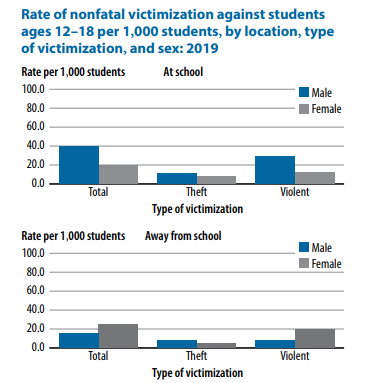            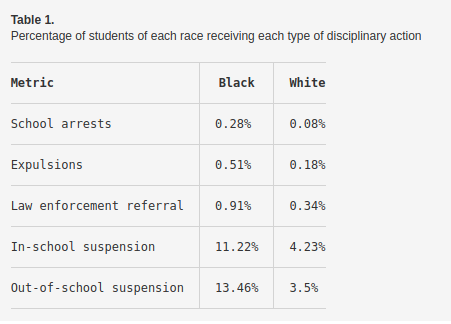

Source: https://bjs.ojp.gov/sites/g/files/xyckuh236/files/media/document/iscs20_sum.pdf


This is precisely why, we chose to look at the School safety program (lp id : 48984,https://www.safeschools.com )


#### **Findings**

For this particular matter, very naturally we used the feature 'pct_black/hispanic' and a look in the below table will reveal that,
districts with more than 60% students of ethnic background have engaged far too less than districts with less than 60%. Moreover, as this percentage goes low, the overall engagement goes higher.

Although, this number does show that a racial factor is at play, but it's not good enough to draw any precise conclusion on the reason behind it. Additional data may help to investigate further. However, authorities should take measures to ensure a higher engagement of student in such programs.

In [ ]:
# Impact on School safety program - SDO - Environmental, Health & Safety (EHS) Compliance

safety_by_quarter = pd.DataFrame(engagements[(engagements['lp_id']==48984)&(engagements['state'].isin(selected_states))].groupby(['pct_black/hispanic','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index=['pct_black/hispanic'])

temp = engagements[(engagements['lp_id']==48984)]
range_count = pd.DataFrame(temp[['district_id','pct_black/hispanic']].drop_duplicates()[['pct_black/hispanic']].value_counts())

for range_value in safety_by_quarter.index.values:
    safety_by_quarter.loc[range_value] = safety_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]

safety_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = safety_by_quarter.sum(axis=1) # total
safety_by_quarter[2] = 100*(safety_by_quarter[2]-safety_by_quarter[1])/safety_by_quarter[1]
safety_by_quarter[3] = 100*(safety_by_quarter[3]-safety_by_quarter[1])/safety_by_quarter[1]
safety_by_quarter[4] = 100*(safety_by_quarter[4]-safety_by_quarter[1])/safety_by_quarter[1]

safety_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

safety_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020',ascending=False)

In [ ]:
source = safety_by_quarter.reset_index()[['pct_black/hispanic','Total no. of page loads/1k student/district in 1st quarter',
       'Sum of page loads/per thousand student/per district in 2020']]

source.columns= ['pct_black/hispanic',1,4]
source = source.melt(id_vars=['pct_black/hispanic'],value_vars=[1,4])
source
source.columns= ['pct_black/hispanic','quarter','Sum of page loads/per thousand student/per district']

chart = alt.Chart(source).mark_bar().encode(
    x='quarter:O',
    y='Sum of page loads/per thousand student/per district:Q',
    color='quarter:N',
    column='pct_black/hispanic:N',
    tooltip=['pct_black/hispanic','Sum of page loads/per thousand student/per district','quarter']
)

# chart.height = 200
chart.width = 80

chart.properties(title={
    'text':['Impact on School safety program'],'subtitle':['Total page load/1k student/district at the end of 1st quarter and at the of year- Percentage of ethnic student wise '],
    })

## **Teacher's development and assistance**

Teaching as a profession possibly became one of the most stressful and difficult jobs during the pandemic. As individuals, teachers not only had to take care of their own families, but to help tons of other families with their children, many of whom arenew and not ready to participate in the mode of online learning. As teachers , it's not always even easy to take care of kids, who are unlikely to engage with proper attention in online classrooms, deprived of the feelings of togetherness. Thus, we all can agree that support to teaching community and their development is a crucial aspect to maintain a healthy education system.

# **Observation 7 : Negative correlation. Districts with higher percentage of student from ethnic backgroud are lagging behind on teachers training and development.**

We explored the data under Primary essential function - 'CM - Teacher Resources - Professional Learning', as among the 'techer resources' category, this is the one that associates with skill development. Below table/chart shows that **districts with higher percentage of student from ethnic backgroud are doing rather badly on teachers training and development.** The correlation is quite linear and positive.

In [ ]:
teachers_by_quarter = pd.DataFrame(engagements[(engagements['Primary Essential Function']=='CM - Teacher Resources - Professional Learning')&(engagements['state'].isin(selected_states))].groupby(['pct_black/hispanic','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index=['pct_black/hispanic'])

temp = engagements[(engagements['Primary Essential Function']=='CM - Teacher Resources - Professional Learning')]
range_count = pd.DataFrame(temp[['district_id','pct_black/hispanic']].drop_duplicates()[['pct_black/hispanic']].value_counts())

for range_value in teachers_by_quarter.index.values:
    teachers_by_quarter.loc[range_value] = teachers_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]

teachers_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = teachers_by_quarter.sum(axis=1) # total

teachers_by_quarter[2] = 100*(teachers_by_quarter[2]-teachers_by_quarter[1])/teachers_by_quarter[1]
teachers_by_quarter[3] = 100*(teachers_by_quarter[3]-teachers_by_quarter[1])/teachers_by_quarter[1]
teachers_by_quarter[4] = 100*(teachers_by_quarter[4]-teachers_by_quarter[1])/teachers_by_quarter[1]

teachers_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

# teachers_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020',ascending=False)

In [ ]:
source = teachers_by_quarter.reset_index()[['pct_black/hispanic','Total no. of page loads/1k student/district in 1st quarter',
       'Sum of page loads/per thousand student/per district in 2020']]

source.columns= ['pct_black/hispanic',1,4]
source = source.melt(id_vars=['pct_black/hispanic'],value_vars=[1,4])
source
source.columns= ['pct_black/hispanic','quarter','Sum of page loads/per thousand student/per district']


chart = alt.Chart(source).mark_bar().encode(
    x='quarter:O',
    y='Sum of page loads/per thousand student/per district:Q',
    color='quarter:N',
    column='pct_black/hispanic:N',
    tooltip=['pct_black/hispanic','Sum of page loads/per thousand student/per district','quarter']
)

# chart.height = 200
chart.width = 80

chart.properties(title={
    'text':['Impact on School safety program'],'subtitle':['Total page load/1k student/district at the end of 1st quarter and at the of year- Percentage of ethnic student wise '],
    })

While it's important to ensure the teacher's development gets priority at all categories above, it's also worth looking up, if school funding has any role to play. A higher funding may result in financial assistance in obtaining certification or paid enrollment in courses or communities that helps teachers in skill development or job support.

For a better clarity on this, this we decided to categorize the funding status of school districts into 3 groups.

**1. Less than 10k**

**2. Between 10k and 16k**

**3. Above 16k**

Above grouping ensures, we have enough districts in each category to make an acceptable inference.

# **Observation 8 : strong positive correlation between funding and teachers development**

An exploration on the same Primary essential function - 'CM - Teacher Resources - Professional Learning' in lines of funding shows a strong positive correlation between funding and teachers development.

Districts with higher funding is showing substantial higher engagement in teachers development and learning related products. **Correlation here also is quite linear and positive. It also shows, a school district funded with more 16k is 3x ahead in engagement than those having funding less than 10k.**

In [ ]:
teachers_by_quarter = pd.DataFrame(engagements[(engagements['Primary Essential Function']=='CM - Teacher Resources - Professional Learning')&(engagements['state'].isin(selected_states))].groupby(['pp_total_raw','quarter'])['engagement_index'].sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index=['pp_total_raw'])

temp = engagements[(engagements['Primary Essential Function']=='CM - Teacher Resources - Professional Learning')]
range_count = pd.DataFrame(temp[['district_id','pp_total_raw']].drop_duplicates()[['pp_total_raw']].value_counts())

for range_value in teachers_by_quarter.index.values:
    teachers_by_quarter.loc[range_value] = teachers_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]

teachers_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = teachers_by_quarter.sum(axis=1) # total

teachers_by_quarter[2] = 100*(teachers_by_quarter[2]-teachers_by_quarter[1])/teachers_by_quarter[1]
teachers_by_quarter[3] = 100*(teachers_by_quarter[3]-teachers_by_quarter[1])/teachers_by_quarter[1]
teachers_by_quarter[4] = 100*(teachers_by_quarter[4]-teachers_by_quarter[1])/teachers_by_quarter[1]

teachers_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

teachers_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020',ascending=False)

In [ ]:
source = teachers_by_quarter.reset_index()[['pp_total_raw','Total no. of page loads/1k student/district in 1st quarter',
       'Sum of page loads/per thousand student/per district in 2020']]

source.columns= ['pp_total_raw',1,4]
source = source.melt(id_vars=['pp_total_raw'],value_vars=[1,4])
source
source.columns= ['pp_total_raw','quarter','Sum of page loads/per thousand student/per district']


chart = alt.Chart(source).mark_bar().encode(
    x=alt.X('pp_total_raw:O',sort='y'),
    y='Sum of page loads/per thousand student/per district:Q',
    color='quarter:N',
    column='quarter:N',
    tooltip=['pp_total_raw','Sum of page loads/per thousand student/per district','quarter'],
    
)

# chart.height = 200
chart.width = 200

chart.properties(title={
    'text':["Teacher's development related engagement at the end of 1st quarter and year"],'subtitle':['Higher funding results in higher engagement'],
    })

## **Pre-school learning or Education at junior grades**

Students as young as 4-6 year old, faced their own set of challenges during pandemic. Instead of having lessons in a colorful classrooms, they had to sit in front of a screen. Instead of playing with their community during breaks, they had to see their parents, busy working with their laptops. For such young children, community bonding is an essential part of their childhood and growth.

6% of all the products present in the product catalogue belong to 'LC - Sites, Resources & Reference - Games & Simulations', which shows the importance given to preschool learning. Most of the products, some are well know like, PBS kids, helps preschool and school aged children in each of the four key areas of childhood development – cognitive, social, emotional and physical.   

# **Observation 9 : Inequity on lines of funding and ethnicity. Linear and strong negative correlation between percentage of student from ethnic background and engagement in preschool learning product. Noticeable association with funding.**

We found evidences of inequity in lines of funding and ethnicity in this analysis.

* Our analysis on 'LC - Sites, Resources & Reference - Games & Simulations' based on community percentage based participation shows **schools with higher percentage of students from ethnic backgrounds are engaging less compared to those having lesser percentage.**

* **Although, we did not find any strong association of funding with this**. For example, 3 of the districts with more 80% African-American/Hispanic students from District of Colorado have highest category of funding. **However, we cannot help but notice that, schools with funding less than 10k are far behind in terms participation in preshool products**. It amounts to almost 5x less engagement than that shown by schools with funding between 10k and 16k and almost 2x less engagement compared to that shown by schools with more than 16k funding.

* Also, a look at the growth metrics in both the tables of funding and community based analysis would show, that **engagement in this segment of products has not increased in 2nd,3rd and 4th quarter, compared to what it was in the 1st quarter, when lockdown was not in effect**.

* **School districts with  less than 10k funding shows that heavy decline of 97% in usage in 2nd quarter**, which indicates preschool or junior grade education took a heavy toll post lockdown and it did not show a sign of recovery even in 4th quarter. Other two categories also took a hit over 50%. However, a sign of recovery can be seen.

*  When we analyse growth of usage based on percentage of ethnic students, we can see that districts with more than 80% ethnic students are showing 65% reduced engagement in 4th quarter, compared to 1st quarter. Whereas, **districts with less than 20% ethnic students are showing a recovery to the normal scales of 1st quarter**.





Further explorations could be done on lines of content and simplicity of usage of these products to understand, why such disparity exists. Most of these products have an emphasis on education of math and science based subjects. Such disparity may result in difficulty of development of interest and skills in science oriented subjects.

In [ ]:
# chart with bar for 'LC - Sites, Resources & Reference - Games & Simulations' highlighted
source = pd.DataFrame(products[products['Primary Essential Function-category']=='LC']['Primary Essential Function'].value_counts(normalize=True)*100).reset_index()
source.columns = ['Primary_Essential_Function','% in all LC category products']

alt.Chart(source).mark_bar().encode(
    x=alt.X('Primary_Essential_Function:O',sort='-y'),
    y="% in all LC category products:Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.Primary_Essential_Function == 'LC - Sites, Resources & Reference - Games & Simulations',  # If the year is 1810 this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    ),
    tooltip=['Primary_Essential_Function','% in all LC category products']
).properties(width=600,title={
    'text':["% of products in each LC subcategory"],'subtitle':['Highlighted bar shows percentage of education oriented games and simulation products'],
    })


In [ ]:
preschool_by_quarter = pd.DataFrame(engagements[(engagements['Primary Essential Function']=='LC - Sites, Resources & Reference - Games & Simulations')&(engagements['state'].isin(selected_states))].groupby(['pct_black/hispanic','quarter']).sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index=['pct_black/hispanic'])

temp = engagements[(engagements['Primary Essential Function']=='LC - Sites, Resources & Reference - Games & Simulations')&(engagements['state'].isin(selected_states))]
range_count = pd.DataFrame(temp[['district_id','pct_black/hispanic']].drop_duplicates()[['pct_black/hispanic']].value_counts())

for range_value in preschool_by_quarter.index.values:
    preschool_by_quarter.loc[range_value] = preschool_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]


preschool_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = preschool_by_quarter.sum(axis=1)# total

preschool_by_quarter[2] = 100*(preschool_by_quarter[2]-preschool_by_quarter[1])/preschool_by_quarter[1]
preschool_by_quarter[3] = 100*(preschool_by_quarter[3]-preschool_by_quarter[1])/preschool_by_quarter[1]
preschool_by_quarter[4] = 100*(preschool_by_quarter[4]-preschool_by_quarter[1])/preschool_by_quarter[1]

preschool_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

# preschool_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020')

In [ ]:
source = preschool_by_quarter.reset_index()[['pct_black/hispanic','Total no. of page loads/1k student/district in 1st quarter',
       'Sum of page loads/per thousand student/per district in 2020']]

source.columns= ['pct_black/hispanic',1,4]
source = source.melt(id_vars=['pct_black/hispanic'],value_vars=[1,4])
source
source.columns= ['pct_black/hispanic','quarter','Sum of page loads/per thousand student/per district']


chart = alt.Chart(source).mark_bar(point=True,size=25).encode(
    x='quarter:O',
    y='Sum of page loads/per thousand student/per district:Q',
    color='quarter:N',
    column='pct_black/hispanic:N',
    tooltip=['pct_black/hispanic','Sum of page loads/per thousand student/per district','quarter']
)

# chart.height = 200
chart.width = 80

chart.properties(title={
    'text':['Impact on preschool learning'],'subtitle':['Total page load/1k student/district at the end of 1st quarter and at the of year- Percentage of ethnic student wise '],
    })



In [ ]:
preschool_by_quarter = pd.DataFrame(engagements[(engagements['pct_black/hispanic']=='[0.8, 1[')&(engagements['Primary Essential Function']=='LC - Sites, Resources & Reference - Games & Simulations')&(engagements['state'].isin(selected_states))].groupby(['pp_total_raw','quarter']).sum())\
.reset_index()\
.pivot(columns='quarter',values='engagement_index',index=['pp_total_raw'])

temp = engagements[(engagements['pct_black/hispanic']=='[0.8, 1[')&(engagements['Primary Essential Function']=='LC - Sites, Resources & Reference - Games & Simulations')&(engagements['state'].isin(selected_states))]
range_count = pd.DataFrame(temp[['district_id','pp_total_raw']].drop_duplicates()[['pp_total_raw']].value_counts())

for range_value in preschool_by_quarter.index.values:
    preschool_by_quarter.loc[range_value] = preschool_by_quarter.loc[range_value]/range_count.loc[range_value].values[0][0]


preschool_by_quarter['Sum of page loads/per thousand student/per district in 2020'] = preschool_by_quarter.sum(axis=1)# total

preschool_by_quarter[2] = 100*(preschool_by_quarter[2]-preschool_by_quarter[1])/preschool_by_quarter[1]
preschool_by_quarter[3] = 100*(preschool_by_quarter[3]-preschool_by_quarter[1])/preschool_by_quarter[1]
preschool_by_quarter[4] = 100*(preschool_by_quarter[4]-preschool_by_quarter[1])/preschool_by_quarter[1]

preschool_by_quarter.rename(columns={
    1: 'Total no. of page loads/1k student/district in 1st quarter',
    2: '% Growth on engagement index/1k student/district in 2nd quarter',
    3: '% Growth on engagement index/1k student/district in 3rd quarter',
    4: '% Growth on engagement index/1k student/district in 4th quarter',
},inplace=True)

preschool_by_quarter.sort_values('Sum of page loads/per thousand student/per district in 2020')

# **Conclusion**


This study explores tracks of our education system, that are less noticed, yet important. We also explained, why these are crucial aspects and needs to be addressed. As we strongly enter the age of digital learning, ignorance on these aspects on monetary or community based bias,are likely to have adverse effect in education system and later in society.  